<span style="font-size: 14pt">EREVAN, May-June 2017</span>

<span style="font-size: 16pt"> Practice day #2: ES models

<span style="color:blue; font-size: 12pt">Alexey Romanenko </span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

<h1 align="center">Info</h1> 

This practice task is desinged for impriving knowledge of ARIMA models and getting aqcuainted with statistical time series analysis in python.

The task should take about 3-5 hours to be completed.

<h1 align="center">1. Reading data (5%)</h1>

  * Download data for following data sets
     - 1) <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv </span>(1 TS of monthly wage in Russia)
     - 2) <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">energy_cunsumption.csv</span> (105 TS of goods sales in shop #36 of one real Retail Net, each TS correspond to an item in shop )
 
 All data you can find by <a href='https://1drv.ms/f/s!AqGgzb5T4tvShZ5by4qa_HFqAAoYIg'>link</a> 
 
 
 * For each data set: 
      - 1) learn it's structure in csv-file and read it into Pandas data frame (be careful with parsing data)
      - 2) plot each time series
      - 3) answer the questions: is there seasonlaity, trend, changes in level in TS? If there is seasonality then define period of seasonality. 

In [1]:
# start with this code
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import math
import statsmodels.api as sm
from scipy import stats
import warnings
import time
from copy import deepcopy
import matplotlib.pyplot as plt

%matplotlib inline

/home/gasia/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


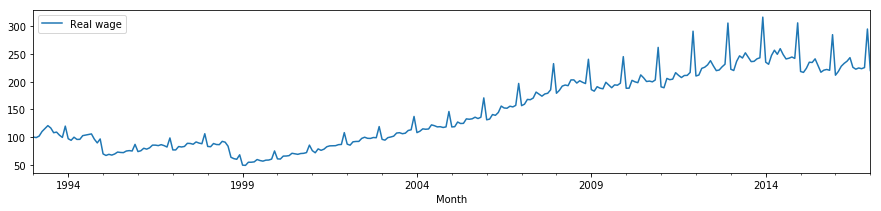

In [2]:
ts = pd.read_csv('./data/monthly-wage.csv', sep=';', decimal='.', index_col='Month', parse_dates=True, dayfirst=True)
ts.plot(figsize=(15,3))

From the plot we can see an obvious trends, in the first part until year 1999, the trend is almost decreasing, then starting from 1999 the trend is increasing. There is a changes in level in TS as the trend is strictly increasing after 1999, and also there is seasonality, let's check the period of the seasonality:

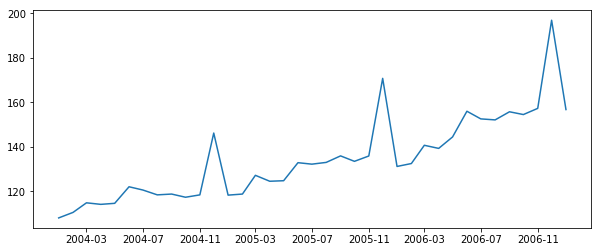

In [3]:
plt.figure(figsize=(10,4))
plt.plot(ts.loc['2004-01-01': '2007-01-01'])
plt.show()

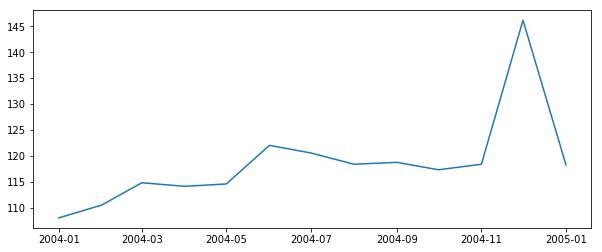

In [4]:
plt.figure(figsize=(10,4))
plt.plot(ts.loc['2004-01-01': '2005-01-01'])
plt.show()

The period of the seasonality is one year which means 12.
We can say that we almost have multiplicative trend with additive seasonality

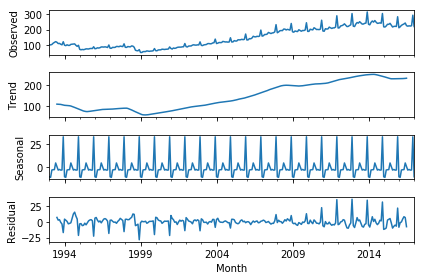

In [5]:
res = sm.tsa.seasonal_decompose(ts['Real wage'].loc['1993-01-01':'2017-01-01'].resample("M").sum())
resplot = res.plot()

We can also notice the trend and seasonality from the decomposite graphs

#### Energy Consumption TS:

In [55]:
ts = pd.read_csv('./data/energy_consump.csv', decimal= '.', sep=',',parse_dates=True, dayfirst=False, index_col='Date')


In [56]:
ts.head()

,Hub,ZSP,EnergyConsump,Temp1,Temp2,Temp3,Temp4,Temp5,Temp6,Temp7,Saturday,Sunday,Temp1_South_Less,Temp2_South_Less,Temp3_South_Less,Temp4_South_Less,Temp1_South_Gr,Temp2_South_Gr,Temp3_South_Gr,Temp4_South_Gr
Date,,,,,,,,,,,,,,,,,,,,
2010-01-01,Center,FZSZOE27,147487.171,-17.8,-16.9,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-02,Center,FZSZOE27,155433.800,-17.8,-20.3,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-03,Center,FZSZOE27,164140.232,-16.4,-24.0,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,Center,FZSZOE27,171382.848,-10.2,-15.7,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,Center,FZSZOE27,170188.290,-7.2,-8.8,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


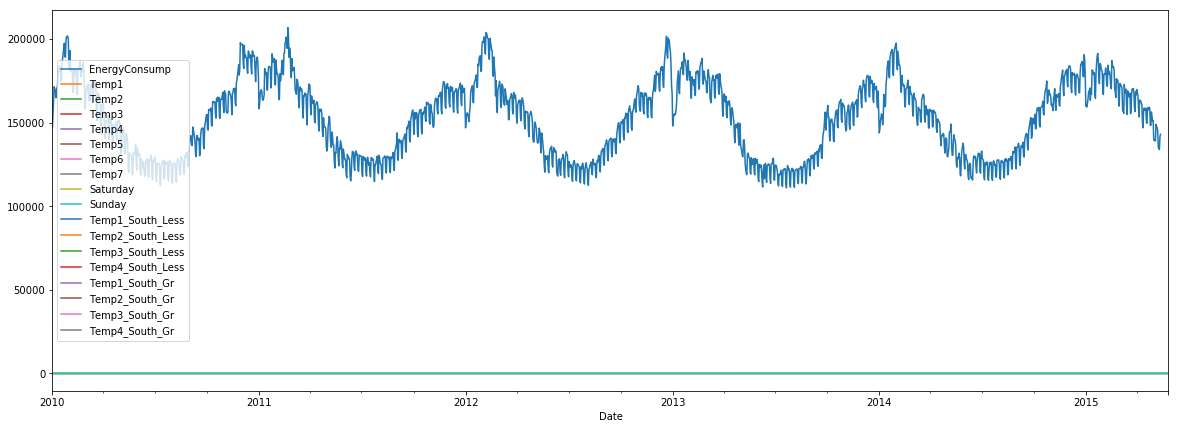

In [58]:
ts.plot(figsize = (20,7))

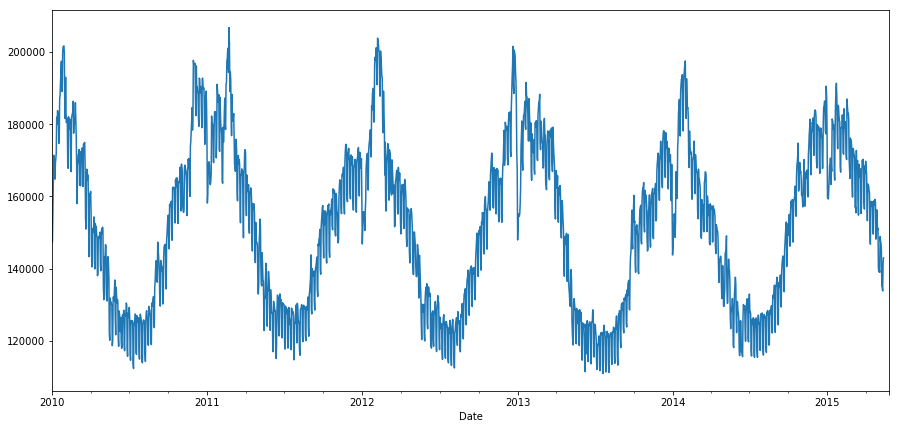

In [9]:
# Plot time series
ts['EnergyConsump'].plot(figsize=(15,7))

In [73]:
df = ts[np.isfinite(ts['EnergyConsump'])]

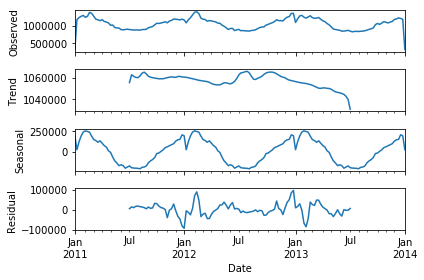

In [251]:
res = sm.tsa.seasonal_decompose(df['EnergyConsump'].loc['2011':'2013'].resample("W").sum())
resplot = res.plot()
seas = res.seasonal

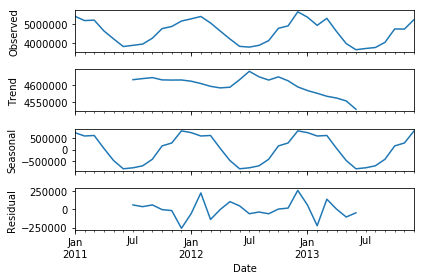

In [381]:
res = sm.tsa.seasonal_decompose(df['EnergyConsump'].loc['2011':'2013'].resample("M").sum())
resplot = res.plot()
seas = res.seasonal

We have weekly and monthly seasonality

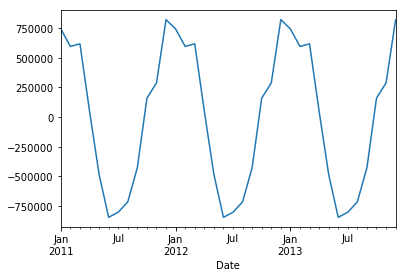

In [382]:
seas.plot()

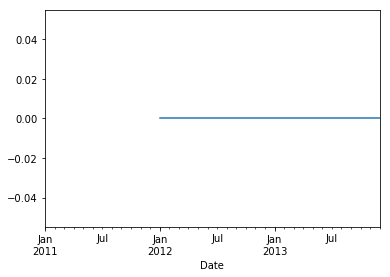

In [384]:
(seas - seas.shift(12)).plot()

The period of the seasonality is 1 year which is 12 months, there is no change in the level in TS. We can also say that we don't have a trend.

--------

<h1 align="center">2. ARIMA Model for wage dataset (40%) </h1>
You need to analyseTS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span> in accordance with forecasting scheme (see lecture slide Scheme of TS forecasting with ARIMA) and then build forecast.

**I. Select ARIMA parameters your self ** 
Also you can follow the next scheme:
<img src='./pic/ARMA Scheme.png'>


Notes: you need follow to the steps
 * 0) Use data before 01.02.2015 
 * 1) Plot the graph of time series, preprocess data (delete tail, make calendar transformation if needed)
 * 2) Dispersion is stabilized through transformation if needed.
 * 3) If the time series is non-stationary the differentiation degrees is
chosen.
 * 4) ACF/PACF are analyzed in order to understand whether AR(p)/MA(q) and seasonal $AR(P)/MA(Q)$  may be used.
 * 5) Candidate models are trained, their AIC/AIC is compared, choose trhe best model.
 * 6) Unbiasedness, stationarity and non-autocorrelation of the residuals of the obtained model are tested; if the tests fail model modifcations are reviewed.
 * 7) Build forecasts and forecastis interval for period from 01.02.2015 to 01.01.2017
     Calculate loss MACAPE of your Forecast.
     Does the forecast look like appropriate?

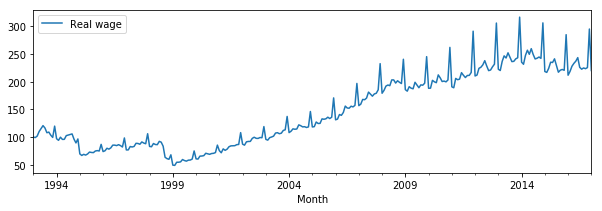

In [11]:
ts = pd.read_csv('./data/monthly-wage.csv', sep=';', decimal='.', index_col='Month', parse_dates=True, dayfirst=True)
ts.plot(figsize=(10,3))

            Real wage
Timestamp            
1993-01-01     100.00
1993-02-01      99.04
1993-03-01     101.77
1993-04-01     110.05
1993-05-01     115.47


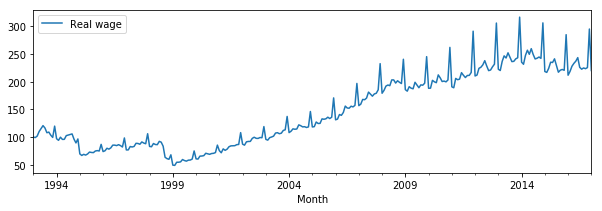

In [12]:
ts_wage = pd.read_csv('./data/monthly-wage.csv', sep=';', decimal='.', parse_dates=True, index_col='Month')
ts_wage.index.names=['Timestamp']
ts_wage = ts_wage.sort_index() # sort index
print(ts_wage.head())
ts.plot(figsize=(10,3))

## <h1 align="center"> -0-

In [13]:
ts_train = ts.loc[:'2015-02-01']

In [14]:
ts_train.tail()

,Real wage
Month,
2014-10-01,244.7
2014-11-01,242.2
2014-12-01,306.4
2015-01-01,218.5
2015-02-01,216.9


In [15]:
ts_train.shape

(266, 1)

## <h1 align="center"> -1-

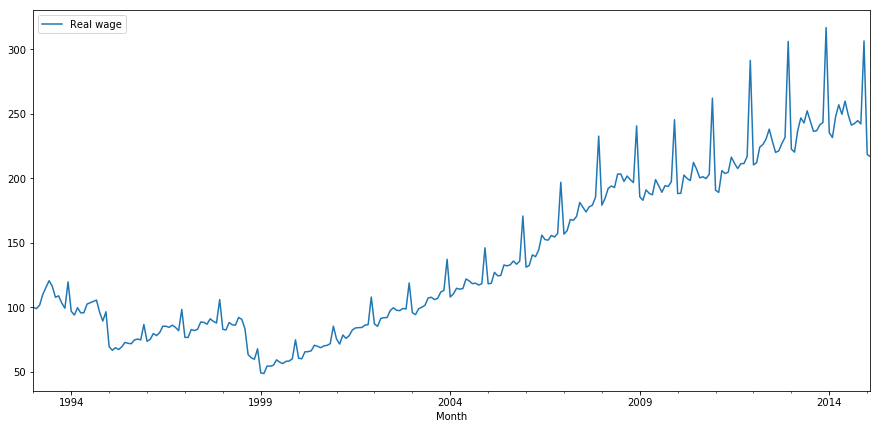

In [16]:
ts_train.plot(figsize = (15,7))

we need to preprocess the data (cut the tail before 1999)

In [17]:
ts_train = ts_train['1999':]

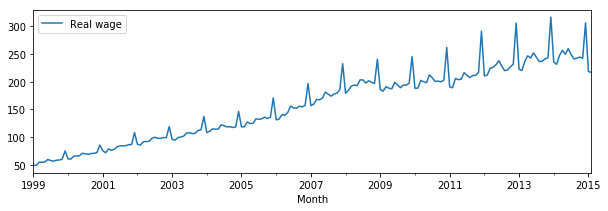

In [18]:
ts_train.plot(figsize = (10,3))

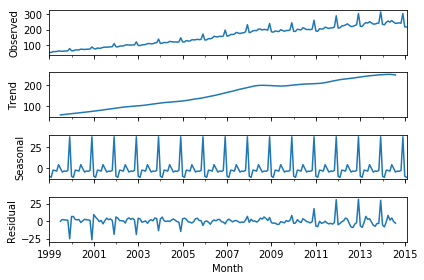

In [19]:
res = sm.tsa.seasonal_decompose(ts_train['Real wage'].resample("M").sum())
resplot = res.plot()
seas = res.seasonal

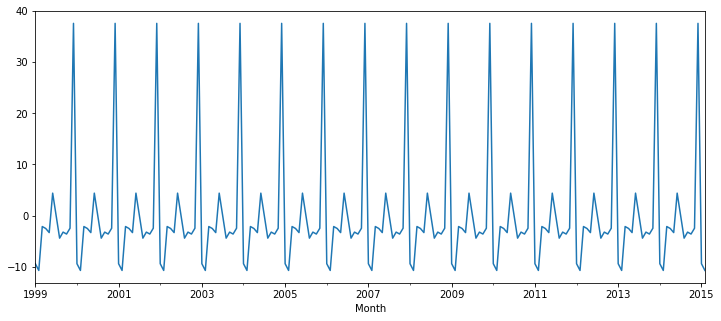

In [20]:
seas.plot(figsize = (12,5))

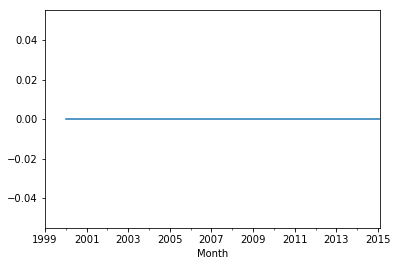

In [21]:
(seas - seas.shift(12)).plot()

The period of seasonality is 1 year, which means 12 months

## <h1 align="center"> -2-

Stabilize the dispersion through boxcox transformation

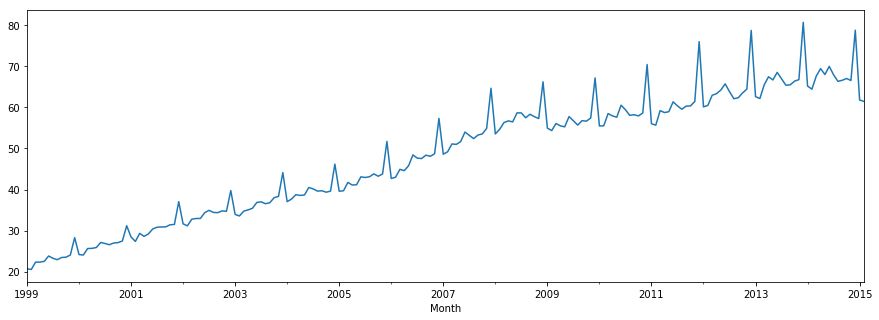

In [22]:
from copy import deepcopy
ts_train_boxcox = deepcopy(ts_train)
ts_train_boxcox['wage_boxcox'], lmbda = stats.boxcox(ts_train)
ts_train_boxcox['wage_boxcox'].plot(figsize=(15,5))

In [23]:
lmbda

array([ 0.70475596])

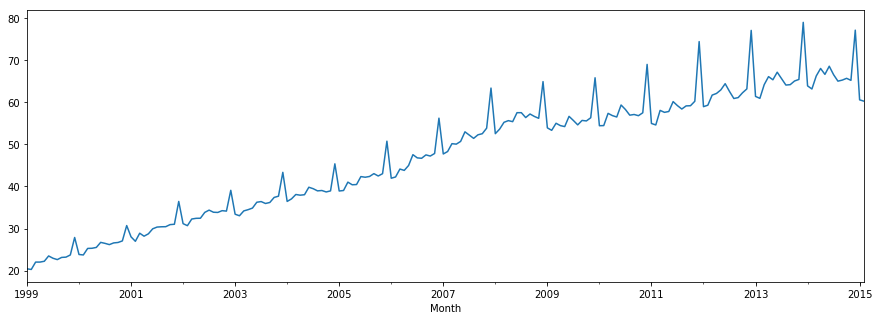

In [24]:
ts_train_boxcox = deepcopy(ts_train)
ts_train_boxcox['wage_boxcox'] = stats.boxcox(ts_train, lmbda = 0.7)
ts_train_boxcox['wage_boxcox'].plot(figsize=(15,5))

with lmbda = 0.7, we are not getting satisfactory results

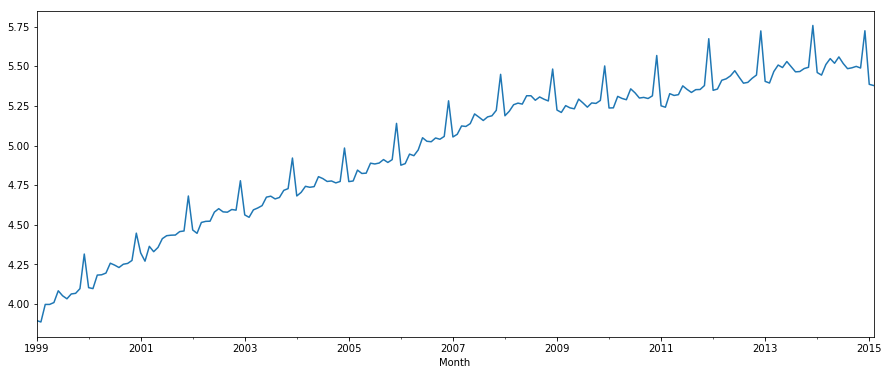

In [25]:
ts_train_boxcox['wage_boxcox'] = np.log(ts_train)
ts_train_boxcox['wage_boxcox'].plot(figsize=(15,6))
# a= stats.boxcox(np.array(ts_wage['Real wage']), lmbda=0.1, alpha=0.05)[0]

By trials I found that lmbda should be equal to -0.2, since we can't interpret the meaning of negative lmbda,so we will stick to lmbda = 0

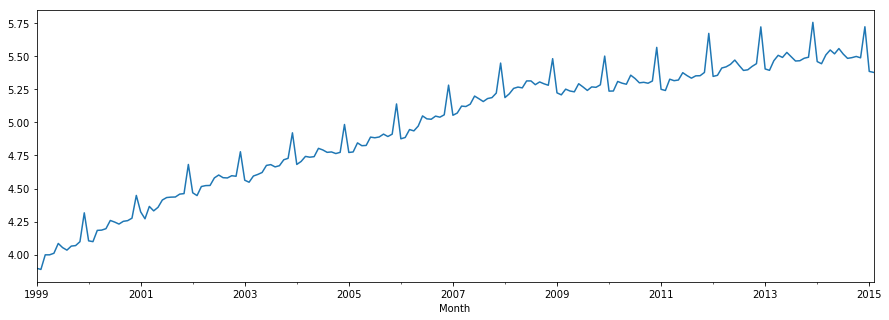

In [26]:
ts_train_boxcox['wage_boxcox'] = stats.boxcox(ts_train, lmbda = 0)
ts_train_boxcox['wage_boxcox'].plot(figsize=(15,5))

## <h1 align="center"> -3-

The time series is non-stationary as it has a trend and a seasonality, we choose a differentiation degrees

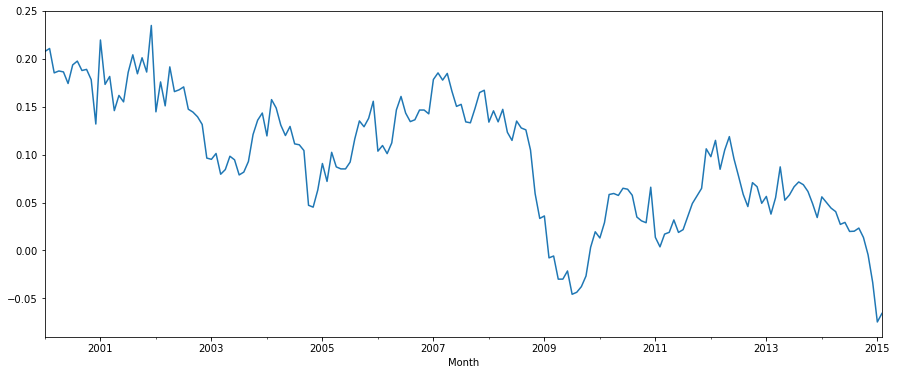

In [27]:
# seasonal differencing
p = 12
sdiff_ts_wage_boxcox = (ts_train_boxcox['wage_boxcox'] - ts_train_boxcox['wage_boxcox'].shift(p))[p:]
sdiff_ts_wage_boxcox = (ts_train_boxcox['wage_boxcox'] - ts_train_boxcox['wage_boxcox'].shift(p))[p:]
sdiff_ts_wage_boxcox.plot(figsize=(15,6))

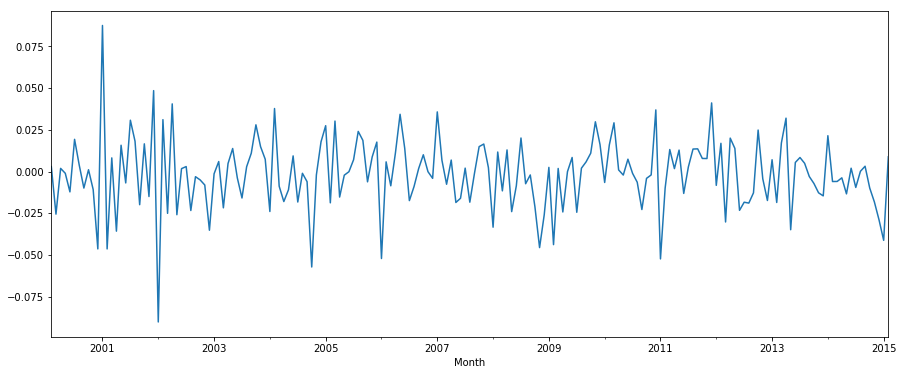

In [28]:
# Trend differencing
diff_sdiff_ts_wage_boxcox = (sdiff_ts_wage_boxcox  - sdiff_ts_wage_boxcox .shift(1))[1:]
diff_sdiff_ts_wage_boxcox.plot(figsize=(15,6))

In [29]:
from statsmodels.tsa import stattools
stat= stattools.kpss(np.array(diff_sdiff_ts_wage_boxcox))
print('The KPSS test statistic %f, \npvalue: %.2f \nmaximal Lag: %i \ntable distribution: %s' % (stat[0], stat[1], stat[2], stat[3]))

The KPSS test statistic 0.069927, 
pvalue: 0.10 
maximal Lag: 14 
table distribution: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


/home/gasia/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1260: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [30]:
ts_train_st = diff_sdiff_ts_wage_boxcox

## <h1 align="center"> -4-

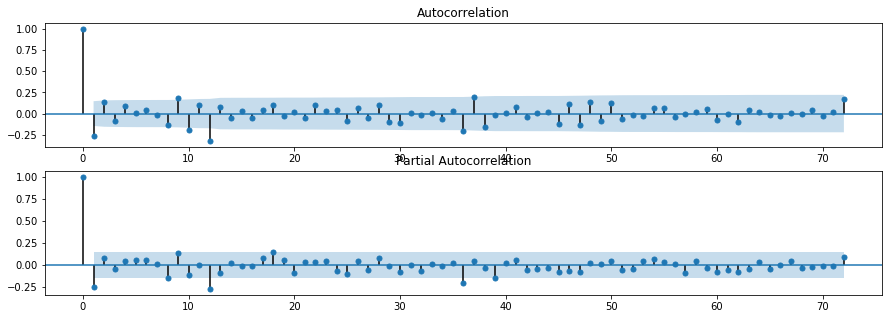

In [31]:
fig = plt.figure(figsize=(15,8))

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_train_st.values.squeeze(), lags=12*6, ax=ax1)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_train_st.values.squeeze(), lags=12*6, ax=ax2)
plt.show()

Possible values: 

s = 12

d = 1

D = 1 (one time seasonal differencing)

d = 1 (one time trend differencing)


Looking to Autocorrelation: 

Q = 1, 3

q = 1, 9, 10

Looking to Partial Autocorrelation: 

P = 1, 3

p = 1, 8, 9

We need to use SARIMAX

## <h1 align="center"> -5-`

In [32]:
import itertools

p = [1, 8, 9]
q = [1, 9, 10]

P = [1, 3]
Q= [1, 3]

d = [1]
D = [1, 2]

pdq = [(x[0], x[1], x[2]) for x in list(itertools.product(p, d, q))]
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]

In [33]:
print('The combinations that we should consider:')

print()
print('for p, d, q:')
print(pdq)

print()
print('for P, D, Q, s:')
print(seasonal_pdq)

The combinations that we should consider:

for p, d, q:
[(1, 1, 1), (1, 1, 9), (1, 1, 10), (8, 1, 1), (8, 1, 9), (8, 1, 10), (9, 1, 1), (9, 1, 9), (9, 1, 10)]

for P, D, Q, s:
[(1, 1, 1, 12), (1, 1, 3, 12), (1, 2, 1, 12), (1, 2, 3, 12), (3, 1, 1, 12), (3, 1, 3, 12), (3, 2, 1, 12), (3, 2, 3, 12)]


In [34]:
#comparing two candidates

start_time = time.time()

warnings.filterwarnings("ignore") # specify to ignore warning messages

sarima_mod1= sm.tsa.statespace.SARIMAX(ts_train['Real wage'], 
                                       order = pdq[0],
                                       seasonal_order = seasonal_pdq[0], 
                                       enforce_stationarity=False, enforce_invertibility=False)



sarima_mod2= sm.tsa.statespace.SARIMAX(ts_train['Real wage'], 
                                       order = pdq[3],
                                       seasonal_order = seasonal_pdq[5], 
                                       enforce_stationarity=False, enforce_invertibility=False)


fit_mod1 = sarima_mod1.fit()
fit_mod2 = sarima_mod2.fit()

print('SARIMA {}x{} - AIC:{}'.format(pdq[0], seasonal_pdq[0] , fit_mod1.aic))
print('SARIMA {}x{} - AIC:{}'.format(pdq[3], seasonal_pdq[5] , fit_mod2.aic))

print("----- %f seconds -----" % (time.time() - start_time))

SARIMA (1, 1, 1)x(1, 1, 1, 12) - AIC:929.5896249269636
SARIMA (8, 1, 1)x(3, 1, 3, 12) - AIC:771.4151789934808
----- 11.171855 seconds -----


The second model is better than the first one

## <h1 align="center"> -6-

##### Unbiasedness, stationarity and non-autocorrelation of the residuals of the obtained model are tested:

In [35]:
# Darbin_Watson statistic
# test autocorrelation
sm.stats.durbin_watson(fit_mod2.resid.values)

1.6046837993502356

value is near 2, means that there is no autocorrelation in the sample

In [36]:
stat = stats.wilcoxon(fit_mod2.resid.values)
print('Statistic: %f\npvalue: %.2f' %(stat[0], stat[1]))

Statistic: 9261.000000
pvalue: 0.80


In [37]:
# Normal test
resid = fit_mod2.resid
stats.normaltest(resid)

NormaltestResult(statistic=96.045219675288195, pvalue=1.3933028995905264e-21)

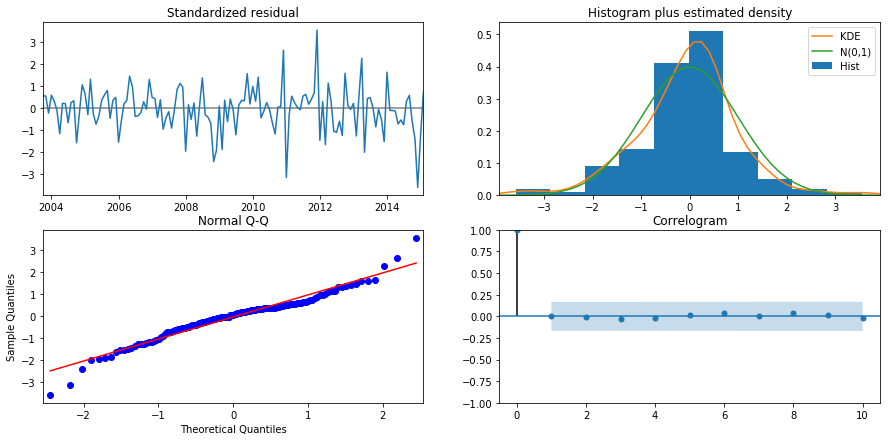

In [38]:
fit_mod2.plot_diagnostics(figsize= (15,7))
plt.show()

#### The following are satisfied: 

* **Unbiasedness**: equality of the average value to zero (Wilcoxn)
* **Non-autocorrelation**: absence of the unacounted dependency on previous observations (Darbin_Watson)
* **Stationarity**: absence of dependency on time (Visual)
* **Normality**: q-q plot


## <h1 align="center"> -7-

 Build forecasts and forecast interval for period from 01.02.2015 to 01.01.2017

In [39]:
model_fit = sm.tsa.statespace.SARIMAX(ts[:'2015-02-01'], 
                                      order=pdq[3], 
                                      seasonal_order=seasonal_pdq[5],
                                      enforce_stationarity=False, enforce_invertibility=False).fit()



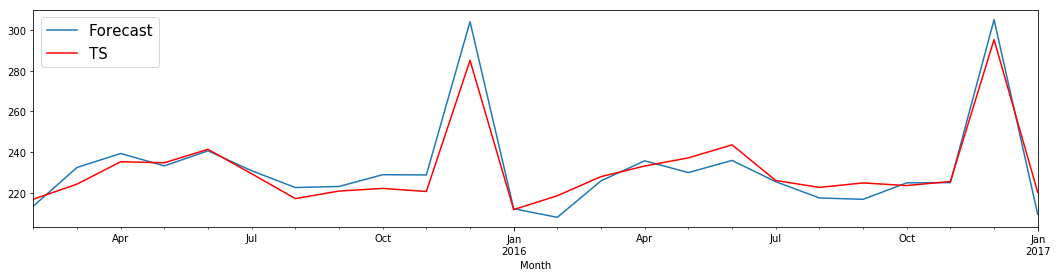

In [40]:
predicted = model_fit.predict( start='2015-02-01', end='2017-01-01')
predicted.plot(figsize=(18,4), label = 'Forecast')
ts["Real wage"]['2015-02-01': ].plot( label='TS',color= 'r' )
plt.legend(fontsize =15)

In [41]:
def qualityMACAPE(x,y):
    qlt = (2*(x-y).abs()/(x+y)).replace([np.inf, -np.inf], np.nan)
    return qlt.mean() , (x-y).abs()

Quality, _ = qualityMACAPE(ts["Real wage"]['2015-02-01': ], predicted)
print( "Accracy is %f" % (1 - Quality))

Accracy is 0.977559


The forecast looks like appropriate, we have almost 97.8% accuracy

------

**II. Find the best parameters of ARIMA automaticaly** 
* 0) Use data before 01.02.2015 
* 1) Plot the graph of time series, preprocess data (delete tail, make calendar transformation if needed)
* 2) Run grid search for ARIMA parameters (at least for 3 distinct values for $p,q,d, P, Q, D$). 
How many time does it take?
* 4) Find the best set of parameters according to AIC.
* 5) Build the forecast of the best model and it's forecasting interval for period from 01.02.2015 to 01.01.2017.
* 6) Calculate locc MACAPE of your forecast.

## <h1 align="center"> -0- and  -1- were done before

the result is ts_train TS

## <h1 align="center"> -2-

From Autocorrolation and Partial Austocorrelation graphs we found some candidates to the argument of SARIMA:

In [42]:
print('The combinations that we should consider:')

print()
print('for p, d, q:')
print(pdq)

print()
print('for P, D, Q, s:')
print(seasonal_pdq)

The combinations that we should consider:

for p, d, q:
[(1, 1, 1), (1, 1, 9), (1, 1, 10), (8, 1, 1), (8, 1, 9), (8, 1, 10), (9, 1, 1), (9, 1, 9), (9, 1, 10)]

for P, D, Q, s:
[(1, 1, 1, 12), (1, 1, 3, 12), (1, 2, 1, 12), (1, 2, 3, 12), (3, 1, 1, 12), (3, 1, 3, 12), (3, 2, 1, 12), (3, 2, 3, 12)]


In [44]:
start_time = time.time()

import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages

loss =[]
loss_min = math.inf
param_min = pdq[0]
param_seasonal_min = seasonal_pdq[0]
res_aic = math.inf

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:

            mod = sm.tsa.statespace.SARIMAX(ts_train['Real wage'],
                                            order = param,
                                            seasonal_order = param_seasonal,
                                            enforce_stationarity = False,
                                            enforce_invertibility = False)

            results = mod.fit()
            res_aic = results.aic
            loss.append(results.aic)
            print('SARIMA {}x{} , AIC: {}'.format(param, param_seasonal, results.aic))
            
                       
        except:
            continue
        
        if res_aic < loss_min:
                loss_min = res_aic
                param_min = param
                param_seasonal_min = param_seasonal
                

print('\nOptimal Parameters:')
print('SARIMA{}x{} - AIC:{}'.format(param_min, param_seasonal_min, loss_min))

print("\n----- %f seconds -----" % (time.time() - start_time))

SARIMA (1, 1, 1)x(1, 1, 1, 12) , AIC: 929.5896249269636
SARIMA (1, 1, 1)x(1, 1, 3, 12) , AIC: 797.5277965292046
SARIMA (1, 1, 1)x(1, 2, 1, 12) , AIC: 860.5269669523059
SARIMA (1, 1, 1)x(1, 2, 3, 12) , AIC: 733.6967345581276
SARIMA (1, 1, 1)x(3, 1, 1, 12) , AIC: 802.189234315211
SARIMA (1, 1, 1)x(3, 1, 3, 12) , AIC: 795.5940509568669
SARIMA (1, 1, 1)x(3, 2, 1, 12) , AIC: 725.4763416300577
SARIMA (1, 1, 1)x(3, 2, 3, 12) , AIC: 720.0246191598702
SARIMA (1, 1, 9)x(1, 1, 1, 12) , AIC: 893.4768616792916
SARIMA (1, 1, 9)x(1, 1, 3, 12) , AIC: 765.8546966746352
SARIMA (1, 1, 9)x(1, 2, 1, 12) , AIC: 826.6535804358673
SARIMA (1, 1, 9)x(1, 2, 3, 12) , AIC: 696.4086577726125
SARIMA (1, 1, 9)x(3, 1, 1, 12) , AIC: 813.6018930258474
SARIMA (1, 1, 9)x(3, 1, 3, 12) , AIC: 760.990006637388
SARIMA (1, 1, 9)x(3, 2, 1, 12) , AIC: 730.1420062412103
SARIMA (1, 1, 9)x(3, 2, 3, 12) , AIC: 680.3950124287159
SARIMA (1, 1, 10)x(1, 1, 1, 12) , AIC: 880.5653188620494
SARIMA (1, 1, 10)x(1, 1, 3, 12) , AIC: 758.712311

In [49]:
print("In total it took", int(910/60), "minutes")

In total it took 15 minutes


## <h1 align="center"> -4-

In [51]:
print("The optimal parameters are:", pdq[2], seasonal_pdq[5] )

The optimal parameters are: (1, 1, 10) (3, 1, 3, 12)


## <h1 align="center"> -5-

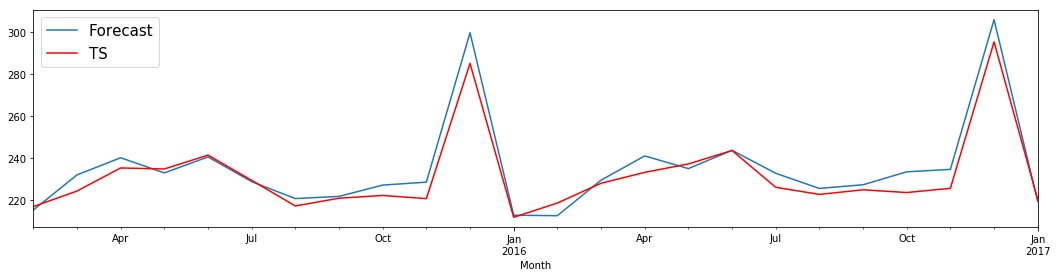

In [52]:
model_fit = sm.tsa.statespace.SARIMAX(ts[:'2015-02-01'], 
                                      order=pdq[2], 
                                      seasonal_order=seasonal_pdq[5],
                                      enforce_stationarity=False, enforce_invertibility=False).fit()

predicted = model_fit.predict( start='2015-02-01', end='2017-01-01')
predicted.plot(figsize=(18,4), label = 'Forecast')
ts["Real wage"]['2015-02-01': ].plot( label='TS',color= 'r' )
plt.legend(fontsize =15)

## <h1 align="center"> -6-

In [53]:
def qualityMACAPE(x,y):
    qlt = (2*(x-y).abs()/(x+y)).replace([np.inf, -np.inf], np.nan)
    return qlt.mean() , (x-y).abs()

Quality, _ = qualityMACAPE(ts["Real wage"]['2015-02-01': ], predicted)
print( "Accracy is %f" % (1 - Quality))

Accracy is 0.980865


We got 98% accuracy!

<h1 align="center">3. ARIMA Momdel for wage dataset (55%) </h1>
You need to analyseTS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">energy_consumption.csv</span> in accordance with forecasting scheme (see lecture slide Scheme of TS forecasting with ARIMA) and then build forecast.

**I. Select ARIMA parameters yourself **
Follow to the steps from 2.I. 

**II. Find the best parameters of ARIMA automaticaly**

** III. Adding of exogenious variables**

* 1) Try to add in models from 3.I. and 3.II exogenious variables (at least one of Temp1, Temp2, Saturday and Sunday).
* 2) Does it make accuracy of foreacast for period from 01.02.2015 to 01.01.2017 better?

In [571]:
energy_ts = pd.read_csv('./data/energy_consump.csv', decimal= '.', sep=',',parse_dates=True, dayfirst=False, index_col='Date')


In [572]:
energy_ts.tail()

,Hub,ZSP,EnergyConsump,Temp1,Temp2,Temp3,Temp4,Temp5,Temp6,Temp7,Saturday,Sunday,Temp1_South_Less,Temp2_South_Less,Temp3_South_Less,Temp4_South_Less,Temp1_South_Gr,Temp2_South_Gr,Temp3_South_Gr,Temp4_South_Gr
Date,,,,,,,,,,,,,,,,,,,,
2015-05-23,Center,FZSZOE27,NaN,11.7,11.9,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-24,Center,FZSZOE27,NaN,12.4,12.8,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-25,Center,FZSZOE27,NaN,16.2,15.4,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-26,Center,FZSZOE27,NaN,18.7,17.3,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-27,Center,FZSZOE27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [489]:
energy_ts.columns

Index(['Hub', 'ZSP', 'EnergyConsump', 'Temp1', 'Temp2', 'Temp3', 'Temp4',
       'Temp5', 'Temp6', 'Temp7', 'Saturday', 'Sunday', 'Temp1_South_Less',
       'Temp2_South_Less', 'Temp3_South_Less', 'Temp4_South_Less',
       'Temp1_South_Gr', 'Temp2_South_Gr', 'Temp3_South_Gr', 'Temp4_South_Gr'],
      dtype='object')

In [580]:
dta = energy_ts[['EnergyConsump','Temp1', 'Temp2', 'Saturday','Sunday']].dropna()
exogs = dta[['Temp1', 'Temp2', 'Saturday','Sunday']][dta.index<'2015-05-01']
extra_exogs = dta[['Temp1', 'Temp2', 'Saturday','Sunday']]
dta = dta[['EnergyConsump']][dta.index<'2015-05-01']
extra_exogs.tail(5)

,Temp1,Temp2,Saturday,Sunday
Date,,,,
2015-05-09,8.0,7.9,1.0,0.0
2015-05-10,10.0,9.5,0.0,1.0
2015-05-11,9.0,6.5,0.0,1.0
2015-05-12,14.0,10.0,0.0,0.0
2015-05-13,0.0,0.0,0.0,0.0


In [491]:
dta.head()

,EnergyConsump
Date,
2010-01-01,147487.171
2010-01-02,155433.800
2010-01-03,164140.232
2010-01-04,171382.848
2010-01-05,170188.290


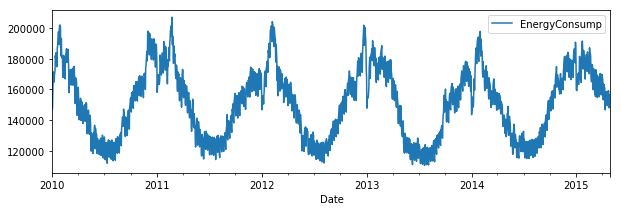

In [492]:
dta.plot(figsize = (10,3))

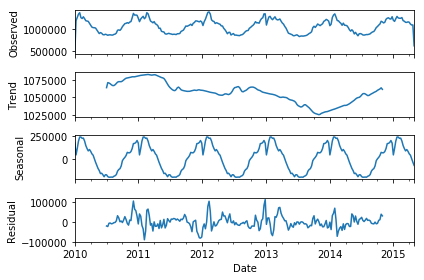

In [493]:
res = sm.tsa.seasonal_decompose(dta['EnergyConsump'].resample('W').sum())
resplot = res.plot()

In [ ]:
(res.seasonal - res.seasonal.shift(52)).plot()

In [ ]:
# See Week seasonality
fig, ax = plt.subplots(figsize=(15,5))

ax2, ax3 = ax.twinx(), ax.twinx()
ax2.set_ylabel('Holidays')
rspine = ax3.spines['right']
rspine.set_position(('axes', 1.25))
ax3.set_frame_on(True)
ax3.patch.set_visible(False)
fig.subplots_adjust(right=0.75)

energy_ts['EnergyConsump'].tail(186).plot(ax = ax,  style='b-')
energy_ts[['Saturday', 'Sunday']].tail(186).plot(ax = ax2, style='r', marker = '^', markersize = 2.0, linewidth=0.0)
energy_ts['Temp1'].tail(186).plot(ax = ax3,  style='g-')

lines = ax.get_lines() + ax3.get_lines() #  ax2.get_lines() 
ax.legend(lines, [l.get_label() for l in lines], loc='lower left')
# uncomment to save the figure
# plt.savefig('../Lecture_TS_Forecasting/pic/Energy_WeekSeasonality.png', bbox_inches='tight', pad_inches=0) # 
# plt.savefig('../Lecture_TS_Forecasting/pic/Energy_WeekSeasonality.eps', bbox_inches='tight', pad_inches=0, format='eps', dpi=1000) 

As we said above, the seasonality is one year (12 months), or week

We will follow those steps:
 * 0) Use data before 01.02.2015 
 * 1) Plot the graph of time series, preprocess data (delete tail, make calendar transformation if needed)
 * 2) Dispersion is stabilized through transformation if needed.
 * 3) If the time series is non-stationary the differentiation degrees is
chosen.
 * 4) ACF/PACF are analyzed in order to understand whether AR(p)/MA(q) and seasonal $AR(P)/MA(Q)$  may be used.
 * 5) Candidate models are trained, their AIC/AIC is compared, choose trhe best model.
 * 6) Unbiasedness, stationarity and non-autocorrelation of the residuals of the obtained model are tested; if the tests fail model modifcations are reviewed.
 * 7) Build forecasts and forecastis interval for period from 01.02.2015 to 01.01.2017
     Calculate loss MACAPE of your Forecast.
     Does the forecast look like appropriate?

## <h1 align="center"> -0-

In [570]:
ts_train = energy_ts[:'2015-02-01']

In [517]:
ts_train.tail()

,Hub,ZSP,EnergyConsump,Temp1,Temp2,Temp3,Temp4,Temp5,Temp6,Temp7,Saturday,Sunday,Temp1_South_Less,Temp2_South_Less,Temp3_South_Less,Temp4_South_Less,Temp1_South_Gr,Temp2_South_Gr,Temp3_South_Gr,Temp4_South_Gr
Date,,,,,,,,,,,,,,,,,,,,
2015-01-28,Center,FZSZOE27,182391.190,-2.4,-1.3,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-29,Center,FZSZOE27,180946.133,-0.8,-1.3,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-30,Center,FZSZOE27,180691.912,0.3,-4.4,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-31,Center,FZSZOE27,168491.737,0.5,-4.6,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-01,Center,FZSZOE27,166711.376,1.1,-1.7,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [518]:
ts_train.shape

(1858, 20)

## <h1 align="center"> -1-

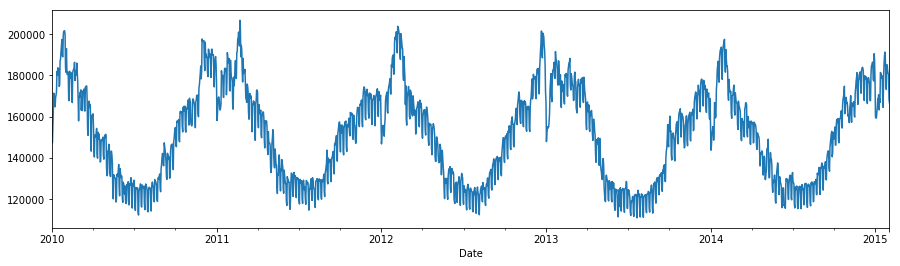

In [526]:
ts_train['EnergyConsump'].plot(figsize = (15,4))

We don't need to preprocess the data

In [527]:
#preprocess the data by dropping nan value
#ts_pre = ts_train['EnergyConsump'].dropna()
#ts_pre.plot(figsize=(15,3))

## <h1 align="center"> -2-

Stabilize the dispersion through boxcox transformation

In [534]:
#ts_train_boxcox = deepcopy(ts_train['EnergyConsump'])
#ts_train_boxcox['wage_boxcox'] = stats.boxcox(ts_train['EnergyConsump'], lmbda = 0)
#ts_train_boxcox['wage_boxcox'].plot(figsize=(15,5))

Our TS doesn't have much dispersion, we can skip this step

## <h1 align="center"> -3-

The time series is non-stationary as it has a  a seasonality, we choose a differentiation degrees

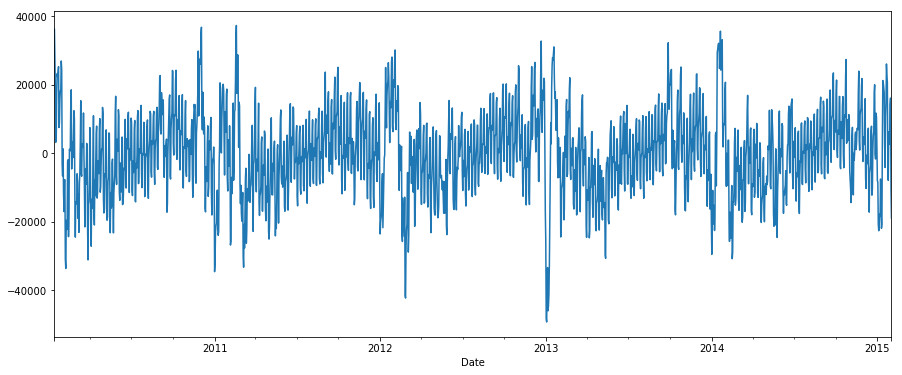

In [535]:
# seasonal differencing
p = 12
sdiff_ts = (ts_train['EnergyConsump'] - ts_train['EnergyConsump'].shift(p))[p:]
#sdiff_ts = (sdiff_ts - sdiff_ts.shift(p))[p:]
sdiff_ts.plot(figsize=(15,6))

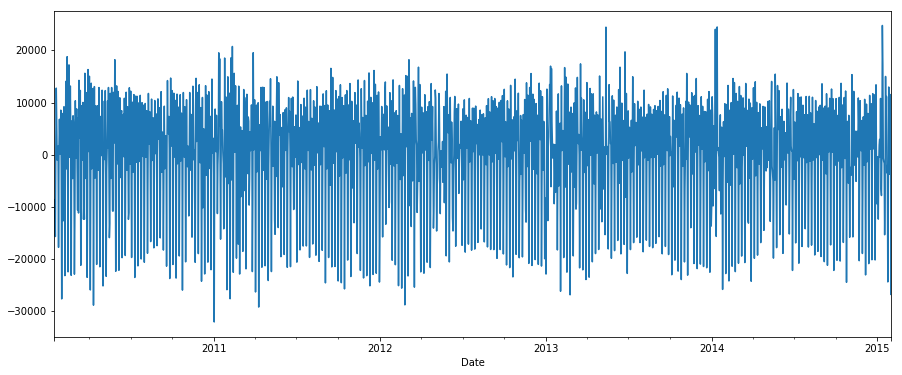

In [536]:
# Trend differencing
diff_sdiff_ts = (sdiff_ts  - sdiff_ts .shift(1))[1:]
diff_sdiff_ts.plot(figsize=(15,6))

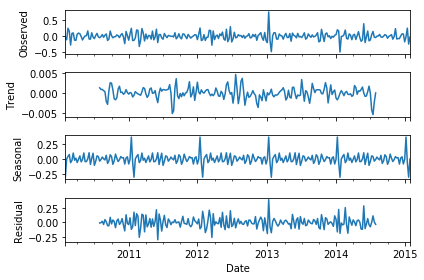

In [537]:
res = sm.tsa.seasonal_decompose(diff_sdiff_ts_wage_boxcox.resample('W').sum())
resplot = res.plot()

In [538]:
ts_train_st = diff_sdiff_ts

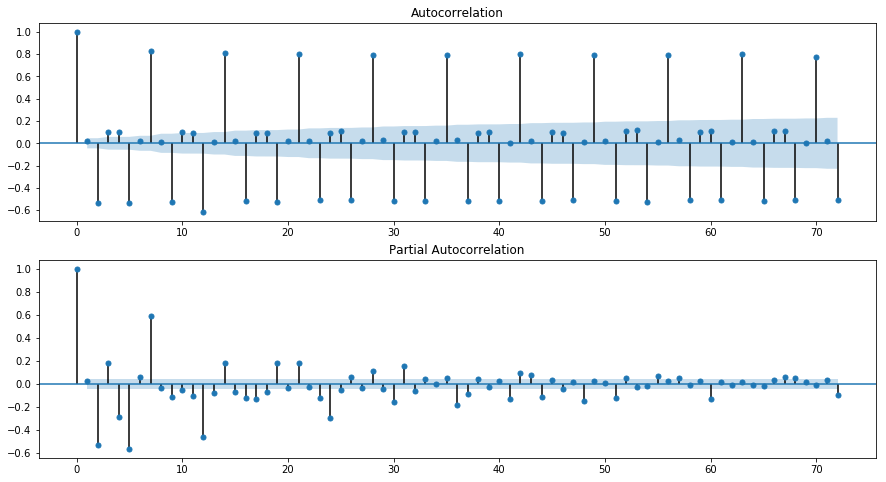

In [539]:
fig = plt.figure(figsize=(15,8))

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_train_st.values.squeeze(), lags=12*6, ax=ax1)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_train_st.values.squeeze(), lags=12*6, ax=ax2)
plt.show()

This is not giving a good results, as we can see the seasonality in the Autocorrelation. Let's try to take the weekly seasonality:

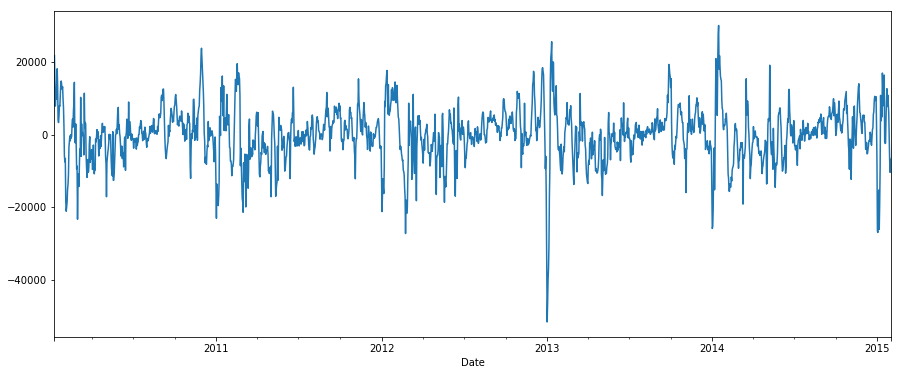

In [540]:
# seasonal differencing
p = 7
sdiff_ts = (ts_train['EnergyConsump'] - ts_train['EnergyConsump'].shift(p))[p:]
#sdiff_ts = (sdiff_ts - sdiff_ts.shift(p))[p:]
sdiff_ts.plot(figsize=(15,6))

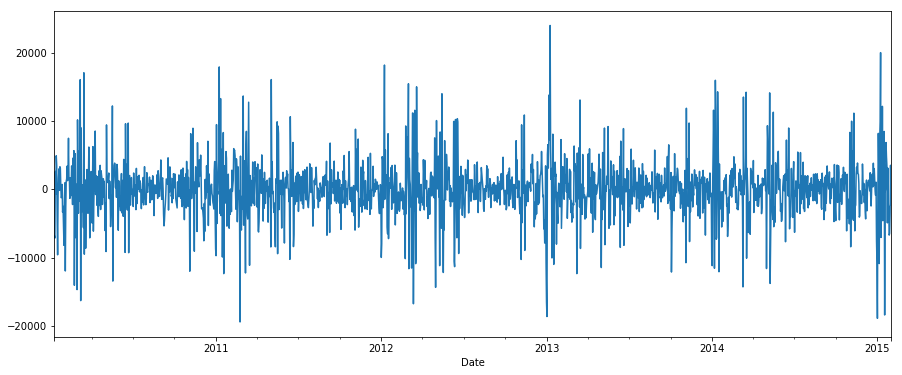

In [541]:
# Trend differencing
diff_sdiff_ts = (sdiff_ts  - sdiff_ts .shift(1))[1:]
diff_sdiff_ts.plot(figsize=(15,6))

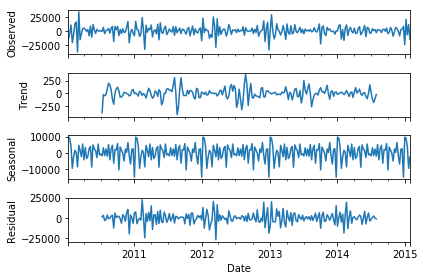

In [542]:
res = sm.tsa.seasonal_decompose(diff_sdiff_ts.resample('W').sum())
resplot = res.plot()

No matter how many differentiation degrees we are taking, we are not getting rid off the seasonality 

In [543]:
from statsmodels.tsa import stattools
stat= stattools.kpss(np.array(diff_sdiff_ts))
print('The KPSS test statistic %f, \npvalue: %.2f \nmaximal Lag: %i \ntable distribution: %s' % (stat[0], stat[1], stat[2], stat[3]))

The KPSS test statistic 0.024708, 
pvalue: 0.10 
maximal Lag: 25 
table distribution: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


In [544]:
ts_train_st = diff_sdiff_ts

## <h1 align="center"> -4-

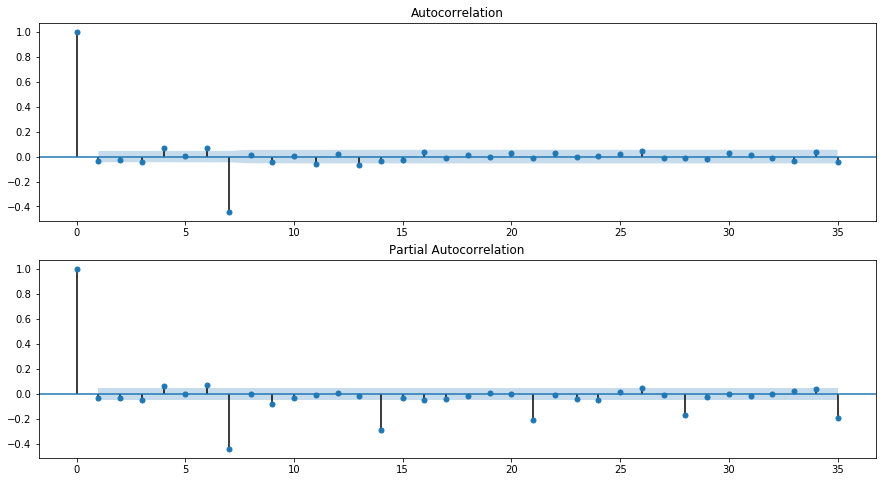

In [545]:
fig = plt.figure(figsize=(15,8))

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_train_st.values.squeeze(), lags=7*5, ax=ax1)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_train_st.values.squeeze(), lags=7*5, ax=ax2)
plt.show()

Weekly Seasonality is much better, It is obvious from the autocorrelation figure

Possible values: 

s = 7

d = 1

D = 2 (two time seasonal differencing)

d = 1 (one time trend differencing)


Looking to Autocorrelation: 

Q = 1, 2

q = 4, 6, 7

Looking to Partial Autocorrelation: 

P = 1

p = 6, 7

We need to use SARIMAX

If we take the data that we already differentiated, then our values would be:

s = 7

d = 0

D = 0


Looking to Autocorrelation: 

Q = 1, 2

q = 4, 6, 7

Looking to Partial Autocorrelation: 

P = 1

p = 4, 6, 7

We need to use SARIMAX

## <h1 align="center"> -5-

In [546]:
import itertools

p = [4, 6, 7]
q = [4, 6, 7]

P = [1, 2]
Q= [1, 2]

d = [1]
D = [1]

s = 7
pdq = [(x[0], x[1], x[2]) for x in list(itertools.product(p, d, q))]
seasonal_pdq = [(x[0], x[1], x[2], s) for x in list(itertools.product(P, D, Q))]

In [547]:
print('The combinations that we should consider:')

print()
print('for p, d, q:')
print(pdq)

print()
print('for P, D, Q, s:')
print(seasonal_pdq)

The combinations that we should consider:

for p, d, q:
[(4, 1, 4), (4, 1, 6), (4, 1, 7), (6, 1, 4), (6, 1, 6), (6, 1, 7), (7, 1, 4), (7, 1, 6), (7, 1, 7)]

for P, D, Q, s:
[(1, 1, 1, 7), (1, 1, 2, 7), (2, 1, 1, 7), (2, 1, 2, 7)]


In [467]:
start_time = time.time()

import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages

loss =[]
loss_min = math.inf
param_min = pdq[0]
param_seasonal_min = seasonal_pdq[0]
res_aic = math.inf

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:

            mod = sm.tsa.statespace.SARIMAX(ts_train['EnergyConsump'],
                                            order = param,
                                            seasonal_order = param_seasonal,
                                            enforce_stationarity = False,
                                            enforce_invertibility = False)

            results = mod.fit()
            res_aic = results.aic
            loss.append(results.aic)
            print('SARIMA {}x{} , AIC: {}'.format(param, param_seasonal, results.aic))
            
                       
        except:
            continue
        
        if res_aic < loss_min:
                loss_min = res_aic
                param_min = param
                param_seasonal_min = param_seasonal
                

print('\nOptimal Parameters:')
print('SARIMA{}x{} - AIC:{}'.format(param_min, param_seasonal_min, loss_min))

print("\n----- %2f minutes -----" % ((time.time() - start_time) / 60 ))

SARIMA (4, 1, 4)x(1, 1, 1, 7) , AIC: 35268.383918385574
SARIMA (4, 1, 4)x(1, 1, 2, 7) , AIC: 35053.27846730847
SARIMA (4, 1, 4)x(2, 1, 1, 7) , AIC: 35094.62403144098
SARIMA (4, 1, 4)x(2, 1, 2, 7) , AIC: 35075.643513855335
SARIMA (4, 1, 6)x(1, 1, 1, 7) , AIC: 35164.24149866775
SARIMA (4, 1, 6)x(1, 1, 2, 7) , AIC: 34978.31095864567
SARIMA (4, 1, 6)x(2, 1, 1, 7) , AIC: 35079.01336097423
SARIMA (4, 1, 6)x(2, 1, 2, 7) , AIC: 35008.974545341225
SARIMA (4, 1, 7)x(1, 1, 1, 7) , AIC: 34920.17995183455
SARIMA (4, 1, 7)x(1, 1, 2, 7) , AIC: 34656.72732381514
SARIMA (4, 1, 7)x(2, 1, 1, 7) , AIC: 34863.71858455279
SARIMA (4, 1, 7)x(2, 1, 2, 7) , AIC: 34627.21126999774
SARIMA (6, 1, 4)x(1, 1, 1, 7) , AIC: 35216.00468700291
SARIMA (6, 1, 4)x(1, 1, 2, 7) , AIC: 35037.00289682518
SARIMA (6, 1, 4)x(2, 1, 1, 7) , AIC: 35037.573991367986
SARIMA (6, 1, 4)x(2, 1, 2, 7) , AIC: 35019.61872149477
SARIMA (6, 1, 6)x(1, 1, 1, 7) , AIC: 35145.763450213315
SARIMA (6, 1, 6)x(1, 1, 2, 7) , AIC: 34992.05994830569
SARIM

Optimal Parameters:
SARIMA(4, 1, 7)x(2, 1, 2, 7) - AIC: 34627.21126999774

In [548]:
# Optimal Params
model = sm.tsa.statespace.SARIMAX(ts_train['EnergyConsump'],
                                            order = pdq[2],
                                            seasonal_order = seasonal_pdq[3],
                                            enforce_stationarity = False,
                                            enforce_invertibility = False)
fit_model = model.fit()

## <h1 align="center"> -6-

### Unbiasedness, stationarity and non-autocorrelation of the residuals of the obtained model are tested:

In [549]:
# Darbin_Watson statistic
# test autocorrelation
sm.stats.durbin_watson(fit_model.resid.values)

1.6398536104541308

value is near 2, means that there is no autocorrelation in the sample

In [550]:
stat = stats.wilcoxon(fit_model.resid.values)
print('Statistic: %f\npvalue: %.2f' %(stat[0], stat[1]))

Statistic: 791667.000000
pvalue: 0.00


In [551]:
# Normal test
resid = fit_model.resid
stats.normaltest(resid)

NormaltestResult(statistic=1987.183421306393, pvalue=0.0)

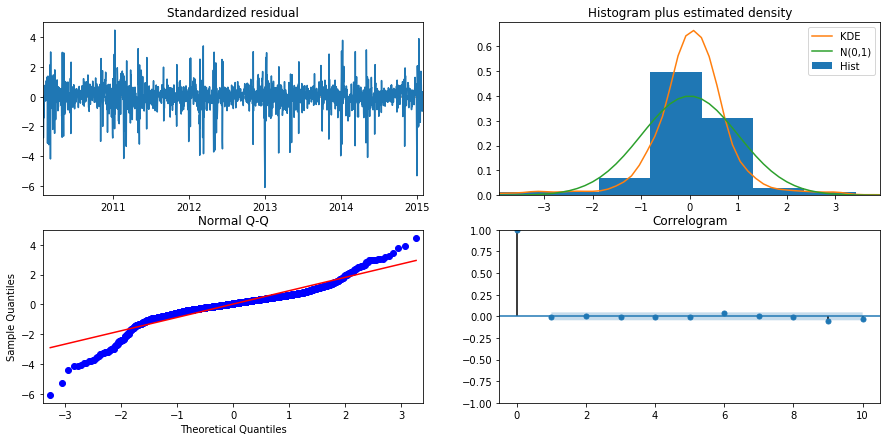

In [552]:
fit_mod.plot_diagnostics(figsize= (15,7))
plt.show()

#### The following are satisfied: 

* **Unbiasedness**: equality of the average value to zero (Wilcoxn)
* **Non-autocorrelation**: absence of the unacounted dependency on previous observations (Darbin_Watson)
* **Stationarity**: absence of dependency on time (Visual)
* **Normality**: q-q plot


## <h1 align="center"> -7-

Build forecasts and forecast interval for period from 01.02.2015 to 01.01.2017

In [642]:
# using optimal Params
model = sm.tsa.statespace.SARIMAX(ts_train['EnergyConsump'],
                                #trend='c',
                                order = pdq[2],
                                seasonal_order = seasonal_pdq[3],
                                enforce_stationarity = False,
                                enforce_invertibility = False)

model_fit = model.fit()

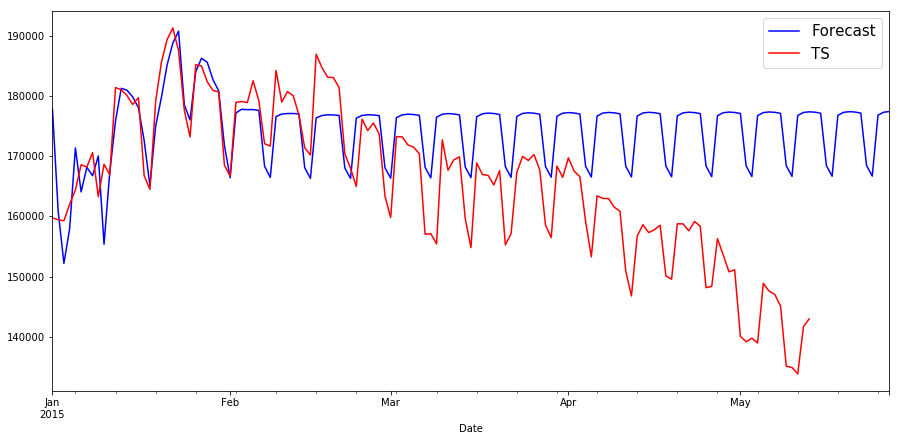

In [644]:
predicted = model_fit.predict(start = '2015-01-01', end = '2015-05-27')
predicted.plot(figsize=(15,7), color='b', label = 'Forecast')
energy_ts['EnergyConsump']['2015-01-01':'2015-05-27'].plot(label='TS',color= 'r')
plt.legend(fontsize =15)

In [649]:
Quality, _ = qualityMACAPE(energy_ts['EnergyConsump']['2015-01-01':'2015-05-27' ], predicted)
print( "Accracy is %f" % (1 - Quality))

Accracy is 0.933972


The forecast looks like appropriate, we have almost 96.7% accuracy

## <h1 align = center> Adding of exogenious variables

 III. Adding of exogenious variables

    1) Try to add in models from 3.I. and 3.II exogenious variables (at least one of Temp1, Temp2, Saturday and Sunday).
    2) Does it make accuracy of foreacast for period from 01.02.2015 to 01.01.2017 better?



In [607]:
exogs = energy_ts[['Temp1', 'Temp2', 'Saturday','Sunday']]
exogs_train = exogs[ : '2015-01-01']

In [622]:
exogs_train.tail()

,Temp1,Temp2,Saturday,Sunday
Date,,,,
2014-12-28,-6.6,-17.6,0.0,1.0
2014-12-29,-11.5,-21.8,0.0,0.0
2014-12-30,-10.8,-11.4,0.0,0.0
2014-12-31,-2.0,-1.3,0.0,0.0
2015-01-01,2.0,1.2,0.0,1.0


In [656]:
start_time = time.time()

import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages

loss =[]
loss_min = math.inf
param_min = pdq[0]
param_seasonal_min = seasonal_pdq[0]
res_aic = math.inf

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:

            mod = sm.tsa.statespace.SARIMAX(ts_train['EnergyConsump'][:"2015-01-01"],
                                            #trend='c',
                                            order = param,
                                            seasonal_order = param_seasonal,
                                            exog = exogs_train,
                                            enforce_stationarity = False,
                                            enforce_invertibility = False)

            results = mod.fit()
            res_aic = results.aic
            loss.append(results.aic)
            print('SARIMA {}x{} , AIC: {}'.format(param, param_seasonal, results.aic))
            
                       
        except:
            continue
        
        if res_aic < loss_min:
                loss_min = res_aic
                param_min = param
                param_seasonal_min = param_seasonal
                

print('\nOptimal Parameters:')
print('SARIMA{}x{} - AIC:{}'.format(param_min, param_seasonal_min, loss_min))

print("\n----- %2f minutes -----" % ((time.time() - start_time) / 60 ))

SARIMA (4, 1, 4)x(1, 1, 1, 7) , AIC: 33352.60963278977
SARIMA (4, 1, 4)x(1, 1, 2, 7) , AIC: 33135.96447113277
SARIMA (4, 1, 4)x(2, 1, 1, 7) , AIC: 33198.88966426525
SARIMA (4, 1, 4)x(2, 1, 2, 7) , AIC: 33137.73968560634
SARIMA (4, 1, 6)x(1, 1, 1, 7) , AIC: 33247.12170120282
SARIMA (4, 1, 6)x(1, 1, 2, 7) , AIC: 33109.63461289185
SARIMA (4, 1, 6)x(2, 1, 1, 7) , AIC: 33199.33356052568
SARIMA (4, 1, 6)x(2, 1, 2, 7) , AIC: 33107.299385088954
SARIMA (4, 1, 7)x(1, 1, 1, 7) , AIC: 32951.8322123255
SARIMA (4, 1, 7)x(1, 1, 2, 7) , AIC: 32784.03545731753
SARIMA (4, 1, 7)x(2, 1, 1, 7) , AIC: 32900.814370870954
SARIMA (4, 1, 7)x(2, 1, 2, 7) , AIC: 32784.10903869747
SARIMA (6, 1, 4)x(1, 1, 1, 7) , AIC: 33354.27428097485
SARIMA (6, 1, 4)x(1, 1, 2, 7) , AIC: 33137.913029747004
SARIMA (6, 1, 4)x(2, 1, 1, 7) , AIC: 33167.54395979302
SARIMA (6, 1, 4)x(2, 1, 2, 7) , AIC: 33166.63126163946
SARIMA (6, 1, 6)x(1, 1, 1, 7) , AIC: 33289.79225814602
SARIMA (6, 1, 6)x(1, 1, 2, 7) , AIC: 33109.33952241418
SARIMA (

In [658]:
# using optimal Params
model = sm.tsa.statespace.SARIMAX(ts_train['EnergyConsump'][:"2015-01-01"],
                                  #trend='c',
                                  order = pdq[5],
                                  seasonal_order = seasonal_pdq[1],
                                  exog = exogs_train,
                                  enforce_stationarity = False,
                                  enforce_invertibility = False)

model_fit = model.fit()

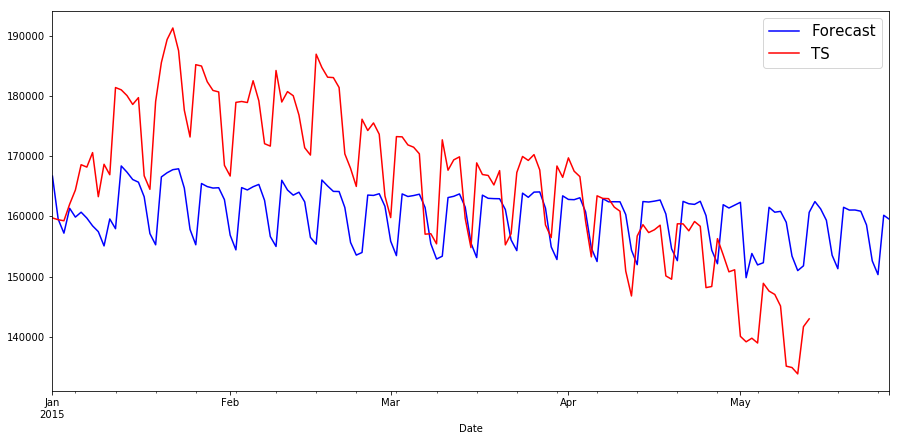

In [660]:
predicted = model_fit.predict(start = '2015-01-01', end = '2015-05-27', exog=exogs["2015-01-01":"2015-05-26"])
predicted.plot(figsize=(15,7), color='b', label = 'Forecast')
energy_ts['EnergyConsump']['2015-01-01':'2015-05-27'].plot(label='TS',color= 'r')
plt.legend(fontsize =15)

In [661]:
Quality, _ = qualityMACAPE(energy_ts['EnergyConsump']['2015-02-01':'2015-05-27'], predicted)
print( "Accracy is %f" % (1 - Quality))

Accracy is 0.940712


Using exogenious variables makes the accuracy better by 0.00673